# Outlier Detection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager

# Zad.
Wczytaj dane z https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [2]:
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


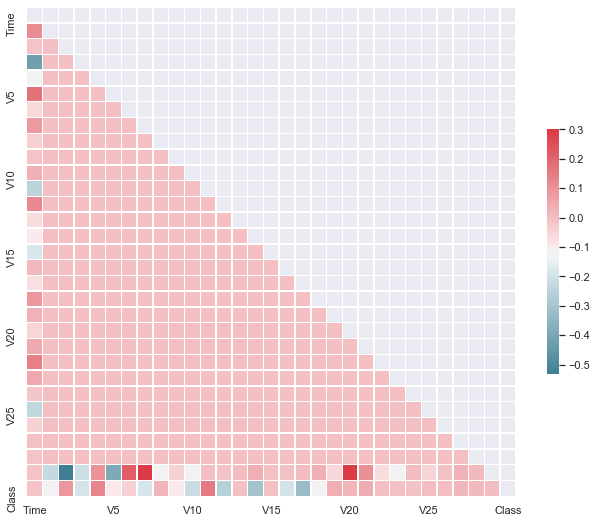

In [3]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

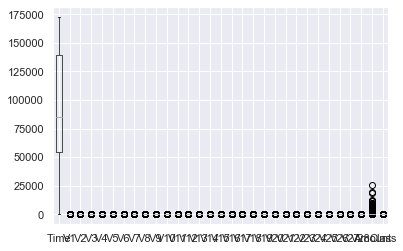

In [4]:
df.boxplot()
plt.show()

In [5]:
X = df.values[:,:-1]
y = df.values[:,-1]
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


# Zad
Sprawdź czy w danych nie ma jakiś mising data

In [6]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Zad

* Poniższy zbiór danych na dane testowe i treniengowe. 
* Zwizualizuj liczności w grupach za pomocą histogramu

In [7]:
X.shape

(284807, 30)

In [8]:
np.unique(y)

array([0., 1.])

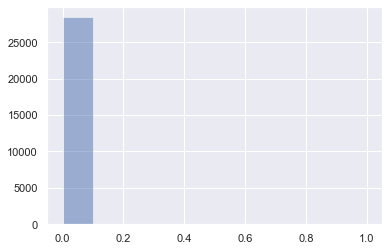

Train class 0 (255883, 30)
Train class 1 (443, 30)
Test class 0 (28432, 30)
Test class 1 (49, 30)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

# plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()
print("Train class 0", X_train[y_train==0].shape)
print("Train class 1", X_train[y_train==1].shape)

print("Test class 0", X_test[y_test==0].shape)
print("Test class 1", X_test[y_test==1].shape)


# Zad.
Naucz na całym zbiorze danych

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_1 = Pipeline([("scaler", StandardScaler()), 
                   ('classifier', RandomForestClassifier())
                  ])

param_grid_1 = {'classifier__n_estimators': [10],
              'classifier__max_depth': [5]
             }

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__max_depth': 5, 'classifier__n_estimators': 10}

In [11]:
from sklearn import  metrics
print("f1_score = ", metrics.f1_score(y_pred= grid_1.predict(X_train), y_true= y_train))
print("f1_score = ", metrics.f1_score(y_pred= grid_1.predict(X_test), y_true= y_test))
print(metrics.confusion_matrix(y_pred= grid_1.predict(X_train), y_true= y_train))
print(metrics.confusion_matrix(y_pred= grid_1.predict(X_test), y_true= y_test))

print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= grid_1.predict(X_train), y_true= y_train))
print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= grid_1.predict(X_test), y_true= y_test))

f1_score =  0.8233799237611181
f1_score =  0.8222222222222222
[[255863     20]
 [   119    324]]
[[28428     4]
 [   12    37]]
balanced_accuracy_score =  0.865649407223704
balanced_accuracy_score =  0.8774806771329804


# Zad 
Wykonaj undersampling i naucz model

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = ros.fit_resample(X_train, y_train)

print(X_undersampled.shape, y_undersampled.shape)

(886, 30) (886,)


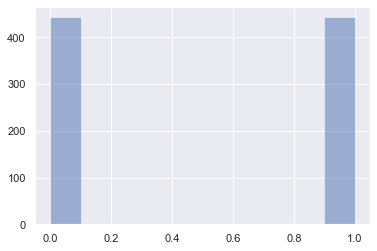

In [13]:
plt.hist(y_undersampled, alpha=0.5)
plt.show()

In [14]:
pipe_1 = Pipeline([("scaler", StandardScaler()), 
                   ('classifier', RandomForestClassifier())
                  ])

param_grid_1 = {'classifier__n_estimators': [50],
              'classifier__max_depth': [50]
             }

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_undersampled, y_undersampled)
grid_1.best_params_

{'classifier__max_depth': 50, 'classifier__n_estimators': 50}

In [15]:
print("f1_score = ", metrics.f1_score(y_pred= grid_1.predict(X_train), y_true= y_train))
print("f1_score = ", metrics.f1_score(y_pred= grid_1.predict(X_test), y_true= y_test))
print(metrics.confusion_matrix(y_pred= grid_1.predict(X_train), y_true= y_train))
print(metrics.confusion_matrix(y_pred= grid_1.predict(X_test), y_true= y_test))

print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= grid_1.predict(X_train), y_true= y_train))
print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= grid_1.predict(X_test), y_true= y_test))

f1_score =  0.07913540550196499
f1_score =  0.0699523052464229
[[245573  10310]
 [     0    443]]
[[27267  1165]
 [    5    44]]
balanced_accuracy_score =  0.9798540739322268
balanced_accuracy_score =  0.9284921129397172


# Zad 

Znajdź najlepszy model:

* EllipticEnvelope
* One-class SVM
* IsolationForest

Wykonaj ewaluację z apomocą

 * Accuracy
 * F1 score

In [16]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn import metrics


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("LSVC", IsolationForest(contamination=0.05))    
])

pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LSVC', IsolationForest(contamination=0.05))])

In [28]:
np.unique(y_test, return_counts=True)

(array([0., 1.]), array([28432,    49], dtype=int64))

In [29]:
np.unique(pipe.predict(X_test), return_counts=True)

(array([-1,  1]), array([ 1480, 27001], dtype=int64))

In [30]:
y_test[y_test==1] = -1
y_test[y_test==0] = 1

y_train[y_train==1] = -1
y_train[y_train==0] = 1
print("f1_score = ", metrics.f1_score(y_pred= pipe.predict(X_train), y_true= y_train))
print("f1_score = ", metrics.f1_score(y_pred= pipe.predict(X_test), y_true= y_test))
print(metrics.confusion_matrix(y_pred= pipe.predict(X_train), y_true= y_train))
print(metrics.confusion_matrix(y_pred= pipe.predict(X_test), y_true= y_test))

print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= pipe.predict(X_train), y_true= y_train))
print("balanced_accuracy_score = ", metrics.balanced_accuracy_score(y_pred= pipe.predict(X_test), y_true= y_test))

f1_score =  0.9749295142893759
f1_score =  0.9739324950841558
[[   370     73]
 [ 12447 243436]]
[[   42     7]
 [ 1438 26994]]
balanced_accuracy_score =  0.8932855608414219
balanced_accuracy_score =  0.9032830211431787
